In [1]:
import pandas as pd
import numpy as np
import re

In [3]:
from google.colab import files
o=files.upload()

Saving walmart_product_reviews_dataset.csv to walmart_product_reviews_dataset.csv
Saving data.csv to data.csv
Saving ebay_reviews.csv to ebay_reviews.csv
Saving flipkart_reviews.csv to flipkart_reviews.csv


In [4]:
amazon_df= pd.read_csv("data.csv")
ebay_df= pd.read_csv("ebay_reviews.csv")
walmart_df=pd.read_csv("walmart_product_reviews_dataset.csv")
flipkart_df= pd.read_csv("flipkart_reviews.csv")

In [5]:
amazon_df.isnull().sum()

Unique_ID         0
Category          0
Review_Header     3
Review_text      27
Rating            0
Own_Rating        0
dtype: int64

In [6]:
amazon_df=amazon_df.dropna()

In [7]:
amazon_df["Review"] = amazon_df["Review_Header"]+" "+amazon_df["Review_text"]
amazon_df=amazon_df[["Review", "Rating"]]
amazon_df

,Review,Rating
0,Nice one I liked it,5
1,Huge battery life with amazing display I bough...,5
2,"Four Stars Awesome book at reasonable price, m...",4
3,Nice quality good,5
4,"Nice book The book is fine,not bad,contains ni...",3
...,...,...
60884,Good Ok,4
60885,"Five Stars Value for money, using since more t...",5
60886,Best in prise Very nice products,5
60887,Not gud pbone Heating problem. Battery backup ...,3


In [8]:
ebay_df.isnull().sum()
ebay_df.head()

,category,review title,review content,rating
0,Headsets,Wireless gaming headset,This gaming headset ticks all the boxes # look...,5
1,Headsets,"Good for those with a big head, low budget","Easy setup, rated for 6 hours battery but mine...",3
2,Headsets,MezumiWireless Gaming Headset,I originally bought this wireless headset for ...,5
3,Headsets,HW- S2 great headset.,"This is my 2nd Mezumi headset, It kills the fi...",5
4,Headsets,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LIFE,This is probably the best headset I've purchas...,5


In [9]:
ebay_df['Review']=ebay_df['review title']+" "+ebay_df['review content']
ebay_df["Rating"] = ebay_df['rating']

ebay_df=ebay_df[['Review', 'Rating']]
ebay_df

,Review,Rating
0,Wireless gaming headset This gaming headset t...,5
1,"Good for those with a big head, low budget Eas...",3
2,MezumiWireless Gaming Headset I originally bou...,5
3,HW- S2 great headset. This is my 2nd Mezumi he...,5
4,BEST HEADPHONES I'VE PURCHASED IN MY ENTIRE LI...,5
...,...,...
44751,Utensil holder Reasonably priced but a little ...,3
44752,Recommended As described,5
44753,cheap looking cheap looking,1
44754,Ok Okay,5


In [10]:
walmart_df.isnull().sum()

crawled_at              0
verified                0
reviewed_at             0
reviewed_by            13
helpful_count           0
not_helpful_count       0
content              4431
raw_content             0
average_rating       1030
review_heading       6619
product_url             0
review_page_url         0
rating                  0
dtype: int64

In [11]:
walmart_df= walmart_df.dropna()
walmart_df['Review'] = walmart_df['review_heading']+" "+walmart_df['content']
walmart_df["Rating"] = walmart_df['rating']
walmart_df= walmart_df[['Review','Rating']]
walmart_df

<ipython-input-11-71dd66fa195d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart_df['Review'] = walmart_df['review_heading']+" "+walmart_df['content']


,Review,Rating
3,Great blinds at a great price. These go up ver...,5.0
4,My mini blind When using the rod to open the b...,4.0
5,bracket arrived broken one of the top brackets...,4.0
6,Hands free blinds I love the sting free pushin...,4.0
7,Shade smaller than measurements on outside of ...,3.0
...,...,...
20628,Perfect Love these little valances. They looke...,5.0
20631,Valance Very pretty and really dresses up my w...,5.0
20633,"really good service Fast, efficient, fair price",4.0
20635,"Tight fit Nice produce , slight problem gettin...",4.0


In [12]:
flipkart_df.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [13]:
flipkart_df=flipkart_df[['Review','Rating']]
flipkart_df

,Review,Rating
0,Best under 60k Great performanceI got it for a...,5
1,Good perfomence...,5
2,Great performance but usually it has also that...,5
3,My wife is so happy and best product 👌🏻😘,5
4,"Light weight laptop with new amazing features,...",5
...,...,...
2299,"Great display, accurate colours at this price ...",5
2300,Superb monitor first brought 1 used for 2 mont...,5
2301,Awesome,5
2302,Only one issue with adapter,5


In [14]:
combined_df = pd.concat([amazon_df,walmart_df,flipkart_df], ignore_index=True)
combined_df

,Review,Rating
0,Nice one I liked it,5.0
1,Huge battery life with amazing display I bough...,5.0
2,"Four Stars Awesome book at reasonable price, m...",4.0
3,Nice quality good,5.0
4,"Nice book The book is fine,not bad,contains ni...",3.0
...,...,...
76281,"Great display, accurate colours at this price ...",5.0
76282,Superb monitor first brought 1 used for 2 mont...,5.0
76283,Awesome,5.0
76284,Only one issue with adapter,5.0


In [15]:
combined_df['Rating'] = combined_df['Rating'].replace({1: -1, 2: -1}).astype(int)
combined_df['Rating'] = combined_df['Rating'].replace({3: 0}).astype(int)
combined_df['Rating'] = combined_df['Rating'].replace({4: 1, 5: 1}).astype(int)
combined_df

,Review,Rating
0,Nice one I liked it,1
1,Huge battery life with amazing display I bough...,1
2,"Four Stars Awesome book at reasonable price, m...",1
3,Nice quality good,1
4,"Nice book The book is fine,not bad,contains ni...",0
...,...,...
76281,"Great display, accurate colours at this price ...",1
76282,Superb monitor first brought 1 used for 2 mont...,1
76283,Awesome,1
76284,Only one issue with adapter,1


In [16]:
combined_df['Rating'].value_counts()/len(combined_df)

 1    0.787576
-1    0.144037
 0    0.068387
Name: Rating, dtype: float64

In [ ]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
y=[]
for i in range(0, len(combined_df)):
    if i in combined_df.index:
        y.append(combined_df['Rating'][i])
        review = re.sub('[^a-zA-Z]', ' ', combined_df['Review'][i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)

In [19]:
len(corpus)

76286

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000)
X = cv.fit_transform(corpus).toarray()
X.shape

(76286, 7000)

In [21]:
y

[1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

In [22]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y), y=y)
class_weights
np.unique(y)

array([-1,  0,  1])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [24]:
model_nb = MultinomialNB().fit(X_train,y_train)
print(model_nb.score(X_train,y_train))
print(model_nb.score(X_test,y_test))

0.871498127340824
0.8578607008651578


In [25]:
model_rf = RandomForestClassifier(class_weight={-1:2.31422158, 0:4.87419334, 1:0.42323974}).fit(X_train, y_train)
print(model_rf.score(X_train,y_train))
print(model_rf.score(X_test,y_test))

0.9847378277153558
0.8627545224154505


Confusion Matrix:
[[ 2445   288   609]
 [  369   428   802]
 [  519   666 16760]]


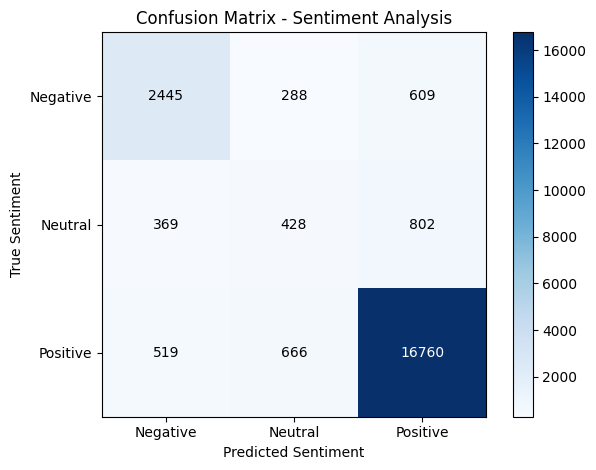

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

y_pred = model_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Sentiment Analysis')
plt.colorbar()

classes = ['Negative', 'Neutral','Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
thresh = cm.max() / 2.0

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center",va="center",color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

Confusion Matrix:
[[ 2212    51  1079]
 [  284   177  1138]
 [  288   301 17356]]


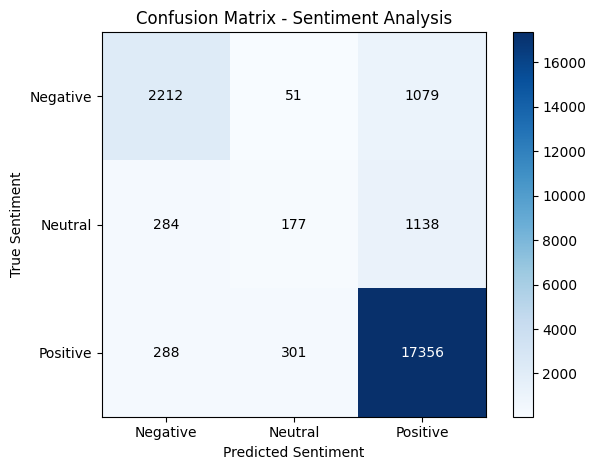

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

y_pred = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Sentiment Analysis')
plt.colorbar()

classes = ['Negative', 'Neutral','Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
thresh = cm.max() / 2.0

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center",va="center",color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()